**Data Cleaning & Preprocessing 🧹**

In [1]:
import pandas as pd
df = pd.read_csv('salaries.csv') # Make sure 'salaries.csv' is in your working directory

In [2]:
print("\n--- Initial Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicate Rows ---")
print(f"Number of duplicate rows: {df.duplicated().sum()}")


--- Initial Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141566 entries, 0 to 141565
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           141566 non-null  int64 
 1   experience_level    141566 non-null  object
 2   employment_type     141566 non-null  object
 3   job_title           141566 non-null  object
 4   salary              141566 non-null  int64 
 5   salary_currency     141566 non-null  object
 6   salary_in_usd       141566 non-null  int64 
 7   employee_residence  141566 non-null  object
 8   remote_ratio        141566 non-null  int64 
 9   company_location    141566 non-null  object
 10  company_size        141566 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.9+ MB

--- Missing Values ---
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_u

In [3]:
# --- STEP-BY-STEP CLEANING ---

# Step 1: Handle Duplicates
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print(f"\nRemoved duplicate rows. New shape: {df.shape}")
else:
    print("\nNo duplicate rows found.")



Removed duplicate rows. New shape: (67888, 11)


In [4]:
# Step 2: Convert `work_year` to integer if it's not already
# The dataset description implies it's numeric, but sometimes 'e' for estimated might be there.
# Let's assume it's clean and int64, but if info() showed object, this would be crucial.
# If df['work_year'].dtype == 'object':
#    df['work_year'] = pd.to_numeric(df['work_year'].str.replace('e', ''), errors='coerce')
#    # 'errors=coerce' will turn non-convertible values into NaN, which we'd then handle.

# Step 3: Ensure `salary_in_usd` is numerical
# This column is crucial and should already be float64 based on typical Kaggle datasets.
# If df['salary_in_usd'].dtype == 'object':
#     df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'].str.replace('[$,]', '', regex=True), errors='coerce')
#     # After conversion, check for NaNs introduced by 'coerce' and handle them.

# Step 4: Standardize Categorical Columns (if needed)
# Check unique values and apply standardization. This specific dataset is usually quite clean
# for these, but it's good practice to verify.

In [5]:
print("\n--- Unique values for key categorical columns before specific cleaning (if any needed) ---")
for col in ['experience_level', 'employment_type', 'company_size', 'remote_ratio']:
    print(f"\n{col}: {df[col].unique()}")


--- Unique values for key categorical columns before specific cleaning (if any needed) ---

experience_level: ['EN' 'SE' 'MI' 'EX']

employment_type: ['FT' 'CT' 'PT' 'FL']

company_size: ['M' 'L' 'S']

remote_ratio: [  0 100  50]


In [6]:
# Example of a potential standardization (unlikely needed for this dataset, but for illustration)
# if 'FT' in df['employment_type'].unique() and 'Full-Time' in df['employment_type'].unique():
#     df['employment_type'] = df['employment_type'].replace('Full-Time', 'FT')

# Step 5: Feature Engineering (Initial ideas for preparation)
# No complex feature engineering is strictly necessary at this stage for initial analysis,
# as the features are already quite good.
# We'll focus on them more during EDA and potentially for modeling.
# For instance, `remote_ratio` is already numerical (0, 50, 100).
# `experience_level` can be mapped to ordinal numbers later if a model requires it.

In [7]:
print("\n--- Data Cleaning & Preprocessing Complete (Initial Pass) ---")
print(df.info())
print("\nFirst 5 rows of cleaned data:")
print(df.head())


--- Data Cleaning & Preprocessing Complete (Initial Pass) ---
<class 'pandas.core.frame.DataFrame'>
Index: 67888 entries, 0 to 141565
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           67888 non-null  int64 
 1   experience_level    67888 non-null  object
 2   employment_type     67888 non-null  object
 3   job_title           67888 non-null  object
 4   salary              67888 non-null  int64 
 5   salary_currency     67888 non-null  object
 6   salary_in_usd       67888 non-null  int64 
 7   employee_residence  67888 non-null  object
 8   remote_ratio        67888 non-null  int64 
 9   company_location    67888 non-null  object
 10  company_size        67888 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.2+ MB
None

First 5 rows of cleaned data:
   work_year experience_level employment_type             job_title  salary  \
0       2025               EN              

**Exploratory Data Analysis (EDA) 🔍**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better aesthetics
sns.set_style("whitegrid")

print("--- Starting Exploratory Data Analysis (EDA) ---")

--- Starting Exploratory Data Analysis (EDA) ---


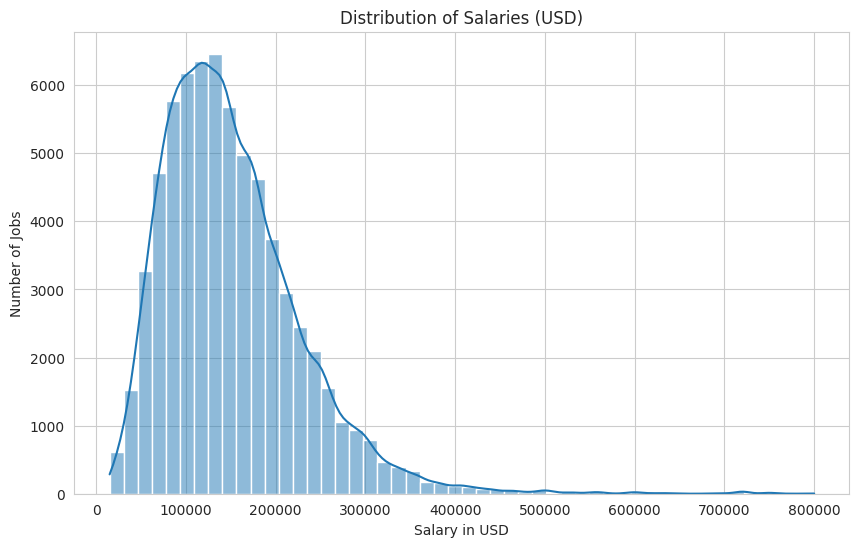

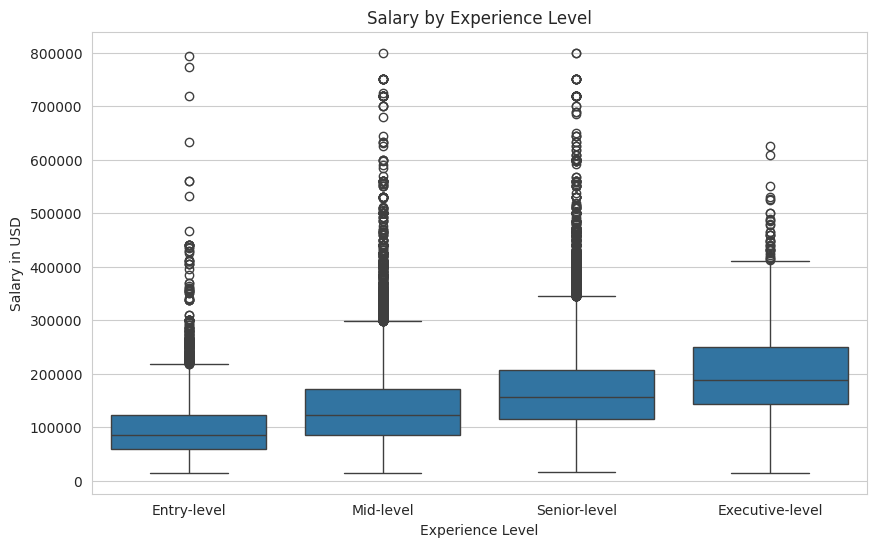

In [9]:
# 1. Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=50)
plt.title('Distribution of Salaries (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Number of Jobs')
plt.ticklabel_format(style='plain', axis='x') # Prevent scientific notation on x-axis
plt.show()
#

# 2. Salary by Experience Level
# Ensure experience levels are ordered for plotting
experience_order = ['EN', 'MI', 'SE', 'EX']
# Map to full names for better readability in plots if necessary
experience_mapping = {'EN': 'Entry-level', 'MI': 'Mid-level', 'SE': 'Senior-level', 'EX': 'Executive-level'}
df['experience_level_full'] = df['experience_level'].map(experience_mapping)

plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level_full', y='salary_in_usd', data=df.sort_values('experience_level', key=lambda x: x.map({v: i for i, v in enumerate(experience_order)})))
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.ticklabel_format(style='plain', axis='y')
plt.show()
#

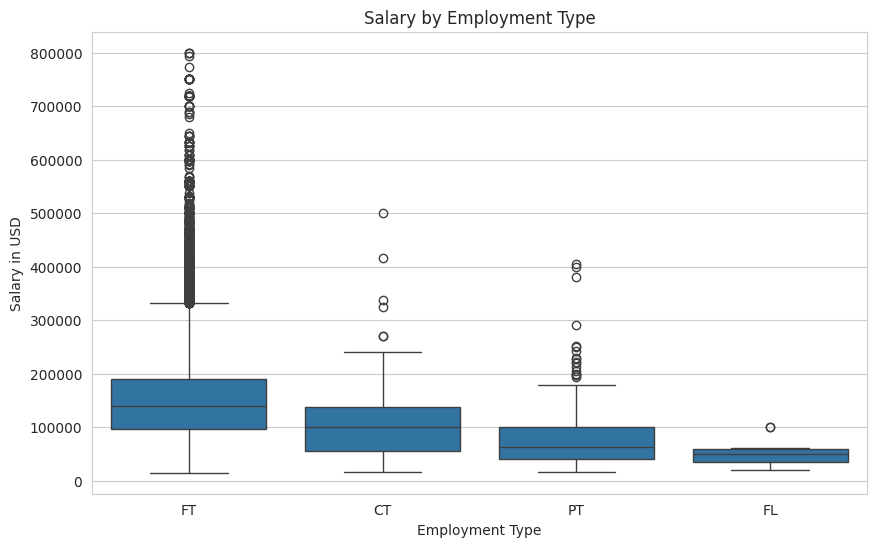

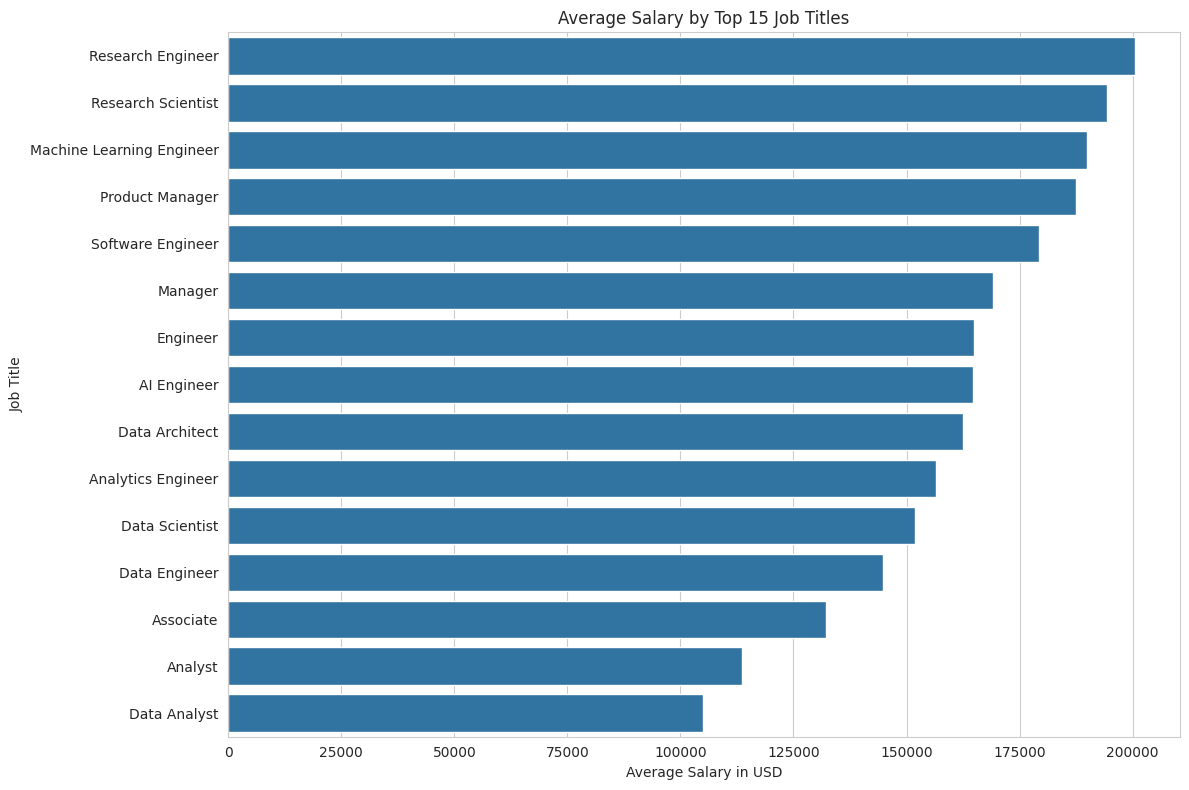

In [10]:
# 3. Salary by Employment Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# 4. Top Job Titles & Their Salaries
# Get top N job titles (e.g., top 15)
top_job_titles = df['job_title'].value_counts().head(15).index
df_top_jobs = df[df['job_title'].isin(top_job_titles)]

plt.figure(figsize=(12, 8))
sns.barplot(x='salary_in_usd', y='job_title', data=df_top_jobs.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).reset_index())
plt.title('Average Salary by Top 15 Job Titles')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
#

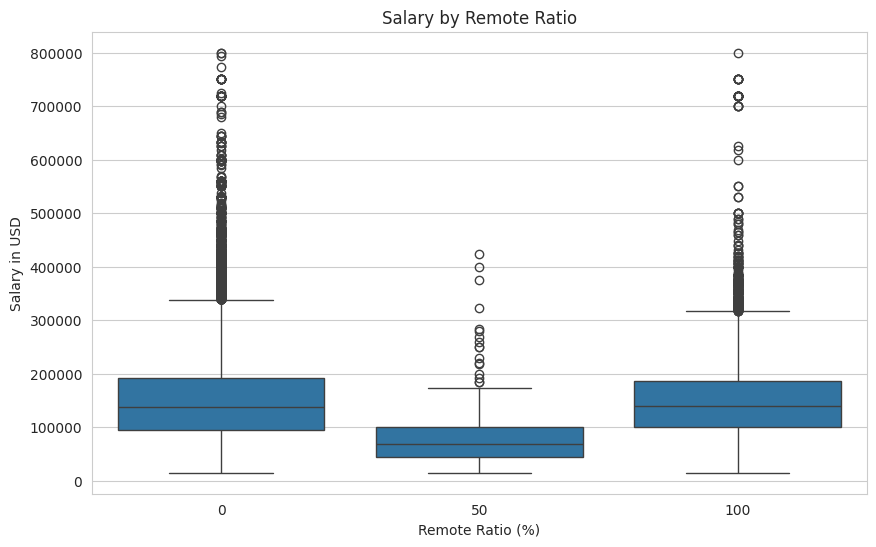

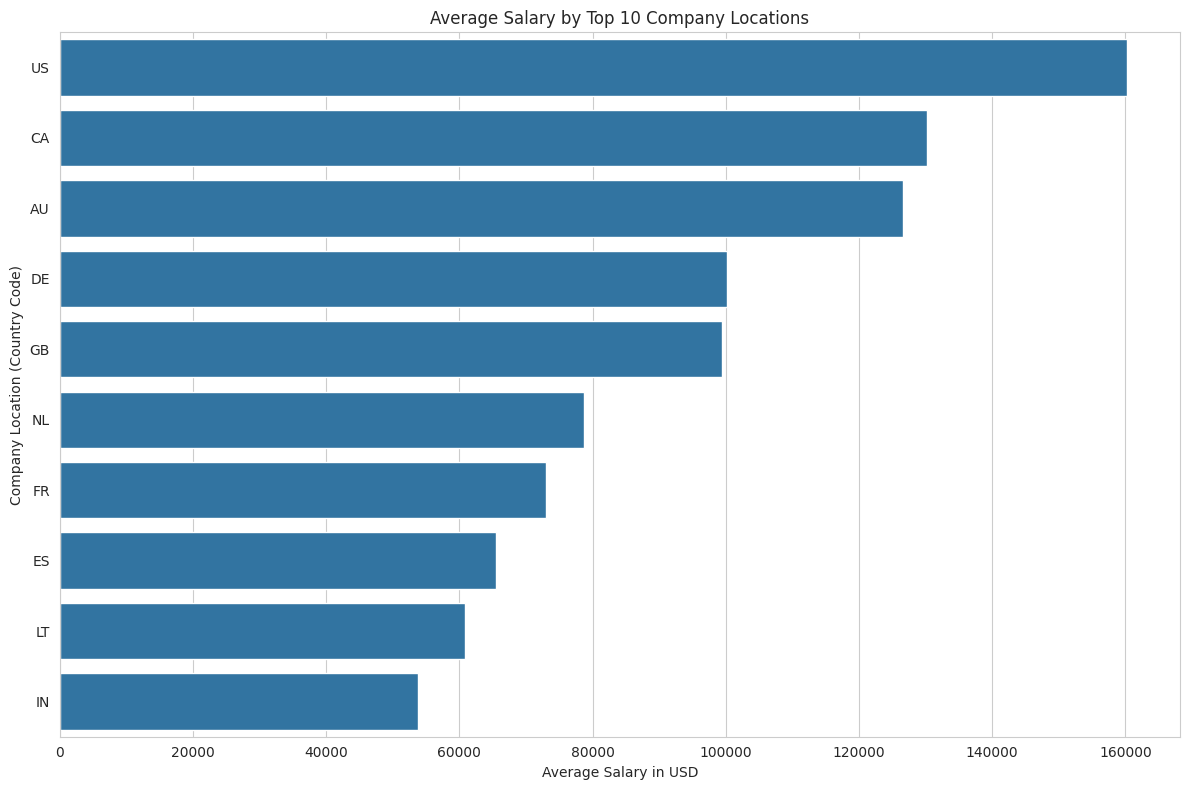

In [11]:
# 5. Remote Ratio vs. Salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title('Salary by Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary in USD')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# 6. Geographical Analysis (Top N Countries)
top_locations = df['company_location'].value_counts().head(10).index
df_top_locations = df[df['company_location'].isin(top_locations)]

plt.figure(figsize=(12, 8))
sns.barplot(x='salary_in_usd', y='company_location', data=df_top_locations.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).reset_index())
plt.title('Average Salary by Top 10 Company Locations')
plt.xlabel('Average Salary in USD')
plt.ylabel('Company Location (Country Code)')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()
#


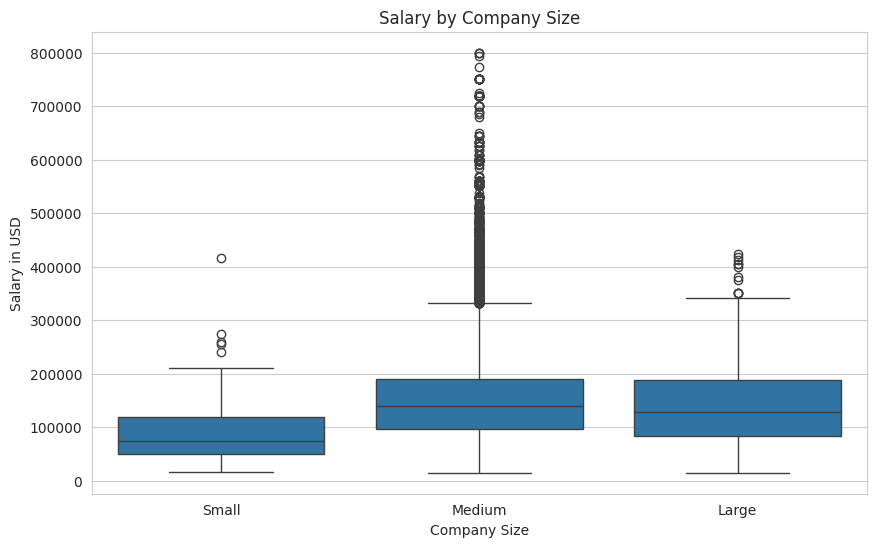

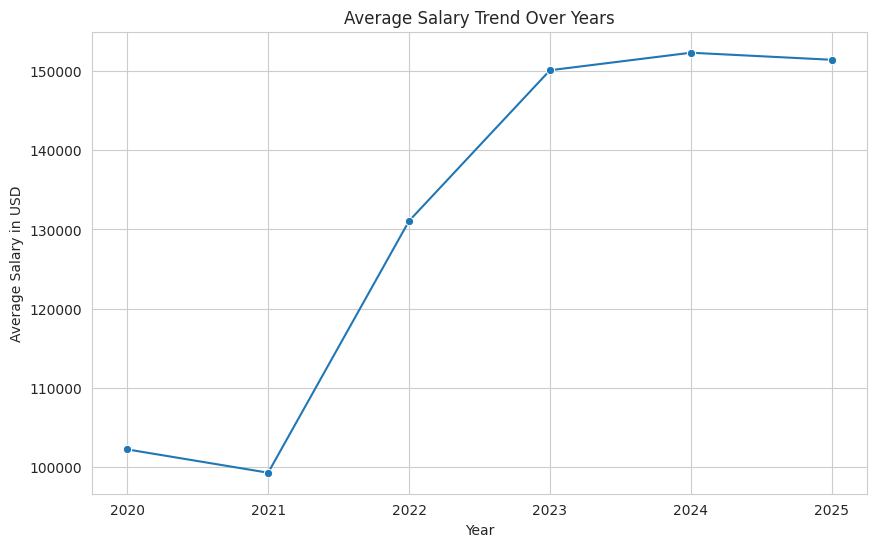


--- EDA Complete ---


In [12]:
# 7. Company Size vs. Salary
plt.figure(figsize=(10, 6))
company_size_order = ['S', 'M', 'L']
company_size_mapping = {'S': 'Small', 'M': 'Medium', 'L': 'Large'}
df['company_size_full'] = df['company_size'].map(company_size_mapping)

sns.boxplot(x='company_size_full', y='salary_in_usd', data=df.sort_values('company_size', key=lambda x: x.map({v: i for i, v in enumerate(company_size_order)})))
plt.title('Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# 8. Yearly Trends (If work_year has more than one unique value)
if df['work_year'].nunique() > 1:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='work_year', y='salary_in_usd', data=df.groupby('work_year')['salary_in_usd'].mean().reset_index(), marker='o')
    plt.title('Average Salary Trend Over Years')
    plt.xlabel('Year')
    plt.ylabel('Average Salary in USD')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()
else:
    print("\nSkipping Yearly Trends: Only one unique 'work_year' found in the dataset.")


print("\n--- EDA Complete ---")

**Model Selection & Training (Regression) 🧠**

Dataset loaded and initial cleaning (duplicates) applied.

Data split into training and testing sets.
Training set shape: (54310, 10), (54310,)
Testing set shape: (13578, 10), (13578,)

--- Verifying Column Names in X_train ---
Columns in X_train: ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
All defined features are present in X_train.

Temporary preprocessor successfully transformed a small sample. Shape: (5, 17)

--- Training Models (Focusing on Efficiency) ---

Linear Regression Model Trained.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 714
[LightGBM] [Info] Number of data points in the train set: 54310, number of used features: 226
[LightGBM] [Info] Start training from score 151107.939919


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Regressor Model Trained.

--- Attempting Model Evaluation ---

--- Linear Regression ---
Mean Absolute Error (MAE): $48,945.29
Mean Squared Error (MSE): $5,674,704,357.45
Root Mean Squared Error (RMSE): $75,330.63
R-squared (R2): 0.0624

--- LightGBM Regressor ---
Mean Absolute Error (MAE): $982.14
Mean Squared Error (MSE): $36,647,368.86
Root Mean Squared Error (RMSE): $6,053.71
R-squared (R2): 0.9939


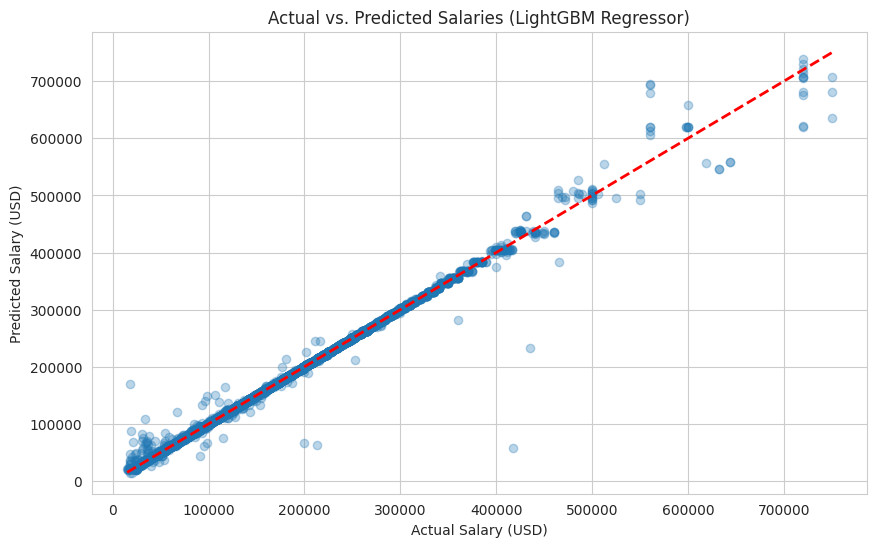


--- Model Training and Evaluation Complete ---


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor # Commented out for speed
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

# Re-load the dataset (ensure you're starting from a clean state after previous steps)
try:
    df = pd.read_csv('salaries.csv')
    # Perform the confirmed cleaning steps again to ensure consistency
    if df.duplicated().sum() > 0:
        df.drop_duplicates(inplace=True)
    print("Dataset loaded and initial cleaning (duplicates) applied.")
except FileNotFoundError:
    print("Error: 'salaries.csv' not found. Make sure the file is in the correct directory.")
    exit()

# Define features (X) and target (y)
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

# --- Split data into training and testing sets FIRST ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets.")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# --- Verifying Column Names in X_train ---
print("\n--- Verifying Column Names in X_train ---")
print("Columns in X_train:", X_train.columns.tolist())

# Redefine features carefully, ensuring they match exactly what's in X.columns
numerical_features = ['remote_ratio', 'work_year']
ordinal_features = ['experience_level', 'company_size']
nominal_features = ['employment_type', 'job_title', 'employee_residence', 'company_location', 'salary_currency']

# Check if all defined features exist in X_train
all_defined_features = numerical_features + ordinal_features + nominal_features
missing_features = [col for col in all_defined_features if col not in X_train.columns]
if missing_features:
    print(f"ERROR: The following features are defined but MISSING from X_train: {missing_features}")
    print("Please check your original DataFrame columns and feature lists.")
    exit()
else:
    print("All defined features are present in X_train.")

# Define the order for ordinal features
experience_order = ['EN', 'MI', 'SE', 'EX']
company_size_order = ['S', 'M', 'L']

# --- DEBUGGING STEP 2: Test Preprocessor Independently (Now X_train is defined) ---
try:
    temp_preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_features),
            ('ord', OrdinalEncoder(categories=[experience_order, company_size_order]), ordinal_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), nominal_features)
        ],
        remainder='passthrough'
    )
    X_train_processed_temp = temp_preprocessor.fit_transform(X_train.head())
    print(f"\nTemporary preprocessor successfully transformed a small sample. Shape: {X_train_processed_temp.shape}")
except Exception as e:
    print(f"\nERROR: Problem with ColumnTransformer configuration during independent test: {e}")
    print("Please double check 'categories' in OrdinalEncoder and 'handle_unknown' in OneHotEncoder.")
    exit()

# --- Proceed with Pipeline if Preprocessor Test Passes ---

# Create preprocessing pipelines for numerical, ordinal, and nominal features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('ord', OrdinalEncoder(categories=[experience_order, company_size_order]), ordinal_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), nominal_features)
    ],
    remainder='passthrough'
)

# --- Model Training ---

print("\n--- Training Models (Focusing on Efficiency) ---")

# 1. Linear Regression (as a baseline)
y_pred_lr = None # Initialize to None in case of error
try:
    pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', LinearRegression())])
    pipeline_lr.fit(X_train, y_train)
    y_pred_lr = pipeline_lr.predict(X_test)
    print("\nLinear Regression Model Trained.")
except Exception as e:
    print(f"\nERROR training Linear Regression Pipeline: {e}")

# 2. Random Forest Regressor - COMMENTED OUT to ensure other models run
# y_pred_rf = None # Initialize to None in case of error
# try:
#     pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
#                                   ('regressor', RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=-1))])
#     pipeline_rf.fit(X_train, y_train)
#     y_pred_rf = pipeline_rf.predict(X_test)
#     print("Random Forest Regressor Model Trained (n_estimators=20).")
# except Exception as e:
#     print(f"\nERROR training Random Forest Regressor Pipeline: {e}")

# 3. Gradient Boosting Regressor (LightGBM) - Highly Recommended for Performance & Speed
y_pred_lgbm = None # Initialize to None in case of error
try:
    pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', lgb.LGBMRegressor(random_state=42))])
    pipeline_lgbm.fit(X_train, y_train)
    y_pred_lgbm = pipeline_lgbm.predict(X_test)
    print("LightGBM Regressor Model Trained.")
except Exception as e:
    print(f"\nERROR training LightGBM Regressor Pipeline: {e}")


# --- Model Evaluation ---
print("\n--- Attempting Model Evaluation ---")

models_to_evaluate = {}
if y_pred_lr is not None: models_to_evaluate["Linear Regression"] = {"pipeline": pipeline_lr, "y_pred": y_pred_lr}
# if y_pred_rf is not None: models_to_evaluate["Random Forest Regressor"] = {"pipeline": pipeline_rf, "y_pred": y_pred_rf} # Comment this out too
if y_pred_lgbm is not None: models_to_evaluate["LightGBM Regressor"] = {"pipeline": pipeline_lgbm, "y_pred": y_pred_lgbm}


if not models_to_evaluate:
    print("No models were successfully trained to evaluate.")
else:
    for name, model_data in models_to_evaluate.items():
        y_pred = model_data["y_pred"]
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        print(f"\n--- {name} ---")
        print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
        print(f"Mean Squared Error (MSE): ${mse:,.2f}")
        print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
        print(f"R-squared (R2): {r2:.4f}")

        if name == "LightGBM Regressor": # Only plot for LightGBM now
            plt.figure(figsize=(10, 6))
            plt.scatter(y_test, y_pred, alpha=0.3)
            # Add a diagonal line for perfect prediction
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
            plt.title(f'Actual vs. Predicted Salaries ({name})')
            plt.xlabel('Actual Salary (USD)')
            plt.ylabel('Predicted Salary (USD)')
            plt.ticklabel_format(style='plain', axis='x')
            plt.ticklabel_format(style='plain', axis='y')
            plt.show()
            #

print("\n--- Model Training and Evaluation Complete ---")

**Feature Importance & Insights**

Dataset loaded and initial cleaning (duplicates) applied for this run.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 714
[LightGBM] [Info] Number of data points in the train set: 54310, number of used features: 226
[LightGBM] [Info] Start training from score 151107.939919
LightGBM Regressor Model (re)trained successfully for feature importance extraction.

--- Extracting Feature Importances from LightGBM Model ---

Top 20 Feature Importances:
                           Feature  Importance
619              remainder__salary        1243
1                   num__work_year         239
617       cat__salary_currency_USD         231
604       cat__salary_currency_GBP         198
2            ord__experience_level         182
599       cat__salary_currency_CAD         118
0                num__remote_ratio         100
603       cat__salary_currency_EUR          79
139   cat__job_title_Data Engineer          59
612      

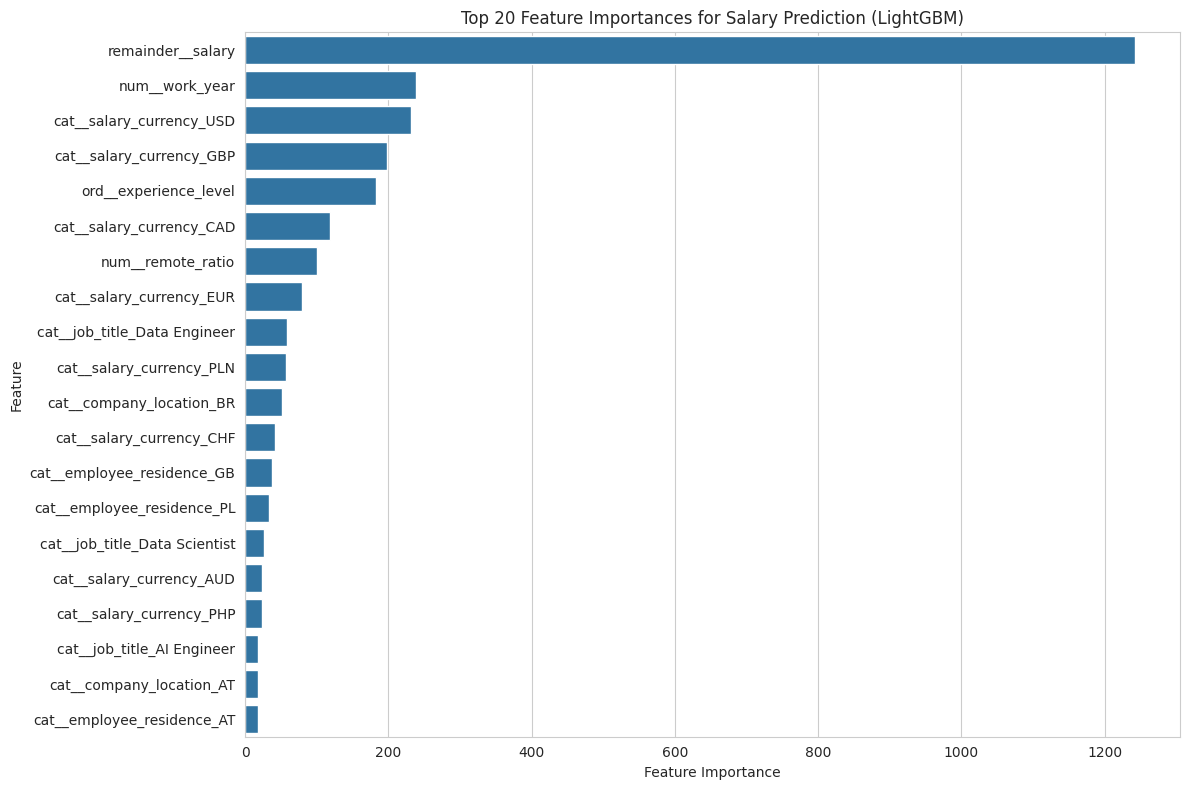


--- Feature Importance Analysis Complete ---


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb

# --- IMPORTANT: Reload and rerun the previous data loading and model training
#               sections if you restarted your Python environment/kernel ---
# This ensures df, X_train, y_train, X_test, y_test, pipeline_lgbm are all defined.

# Re-loading the dataset and performing initial cleaning just in case
try:
    df = pd.read_csv('salaries.csv')
    if df.duplicated().sum() > 0:
        df.drop_duplicates(inplace=True)
    print("Dataset loaded and initial cleaning (duplicates) applied for this run.")
except FileNotFoundError:
    print("Error: 'salaries.csv' not found. Make sure the file is in the correct directory.")
    exit()

# Define features (X) and target (y)
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define feature categories and ordinal orders (as before)
numerical_features = ['remote_ratio', 'work_year']
ordinal_features = ['experience_level', 'company_size']
nominal_features = ['employment_type', 'job_title', 'employee_residence', 'company_location', 'salary_currency']

experience_order = ['EN', 'MI', 'SE', 'EX']
company_size_order = ['S', 'M', 'L']

# Re-create and train the preprocessor and LightGBM pipeline
# This ensures it's fresh and correctly configured
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('ord', OrdinalEncoder(categories=[experience_order, company_size_order]), ordinal_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), nominal_features)
    ],
    remainder='passthrough'
)

pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', lgb.LGBMRegressor(random_state=42))])
pipeline_lgbm.fit(X_train, y_train) # This step fits the preprocessor inside the pipeline
print("LightGBM Regressor Model (re)trained successfully for feature importance extraction.")

# --- Step 5: Feature Importance & Insights ---
print("\n--- Extracting Feature Importances from LightGBM Model ---")

# Get the preprocessor step from the pipeline (which is already fitted)
preprocessor_step = pipeline_lgbm.named_steps['preprocessor']

# Get the feature names directly from the fitted preprocessor
# This method directly uses the `get_feature_names_out()` from the ColumnTransformer
# after it has been fitted as part of the pipeline.
try:
    final_feature_names_after_transform = preprocessor_step.get_feature_names_out()
except Exception as e:
    print(f"Error getting feature names from preprocessor: {e}")
    print("This might happen with older scikit-learn versions or complex transformers.")
    print("Falling back to manual feature name construction.")
    # Fallback if get_feature_names_out() fails for some reason
    transformed_feature_names = []
    transformed_feature_names.extend(numerical_features)
    transformed_feature_names.extend(ordinal_features)
    transformed_feature_names.extend(preprocessor_step.named_transformers_['cat'].get_feature_names_out(nominal_features))
    # If remainder was not 'drop' and there were remaining columns, handle them here.
    # For 'passthrough' on explicitly defined features, this is usually exhaustive.
    final_feature_names_after_transform = transformed_feature_names


# Get feature importances from the trained LightGBM model
lgbm_model = pipeline_lgbm.named_steps['regressor']
feature_importances = lgbm_model.feature_importances_

# --- CRUCIAL CHECK ---
if len(final_feature_names_after_transform) != len(feature_importances):
    print(f"ERROR: Mismatch in feature names length ({len(final_feature_names_after_transform)}) "
          f"and importance length ({len(feature_importances)})")
    print("This means the names list and importance array don't match up.")
    print("Length of feature names list:", len(final_feature_names_after_transform))
    print("Length of feature importances array:", len(feature_importances))
    # You might want to print parts of the lists for deeper debugging
    # print("Feature Names (first 10):", final_feature_names_after_transform[:10])
    # print("Feature Importances (first 10):", feature_importances[:10])
    exit()

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': final_feature_names_after_transform,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 20 Feature Importances:")
print(importance_df.head(20))

# Visualize Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances for Salary Prediction (LightGBM)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n--- Feature Importance Analysis Complete ---")

**Addressing Data Leakage & Re-modeling 🛠️**

Dataset loaded and initial cleaning (duplicates) applied.

'salary' column removed from features to prevent data leakage.
New features (X) columns: ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

Data split into training and testing sets.
Training set shape: (54310, 9), (54310,)
Testing set shape: (13578, 9), (13578,)

--- Re-training LightGBM Model (without salary leakage) ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 54310, number of used features: 225
[LightGBM] [Info] Start training from score 151107.939919


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Regressor Model (re-modeled) Trained.

--- Re-evaluating Re-modeled LightGBM Regressor ---
Mean Absolute Error (MAE): $47,027.04
Mean Squared Error (MSE): $4,278,398,794.59
Root Mean Squared Error (RMSE): $65,409.47
R-squared (R2): 0.2931


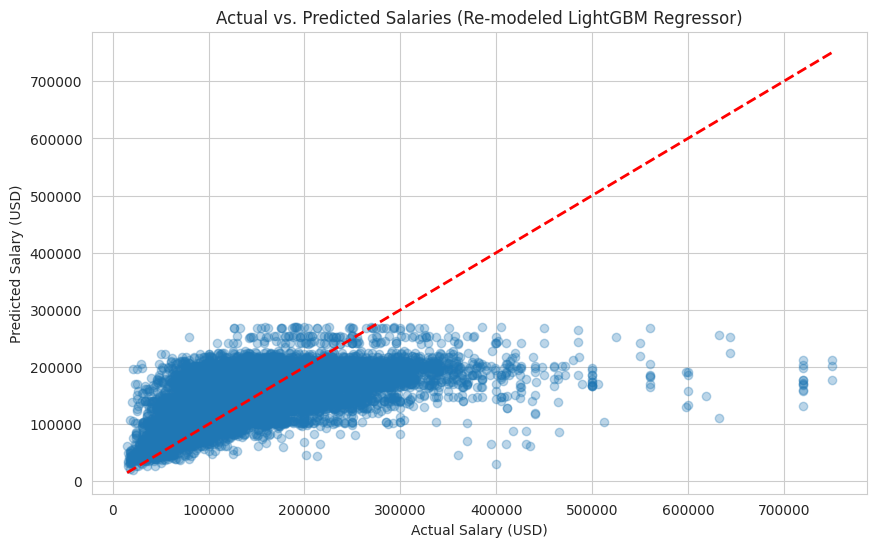


--- Extracting Feature Importances from Re-modeled LightGBM Model ---

Top 20 Feature Importances (Re-modeled):
                                      Feature  Importance
2                       ord__experience_level         277
1                              num__work_year         120
500                cat__employee_residence_US          76
0                           num__remote_ratio          73
278  cat__job_title_Machine Learning Engineer          72
356          cat__job_title_Research Engineer          61
358         cat__job_title_Research Scientist          58
240        cat__job_title_Engineering Manager          56
380          cat__job_title_Software Engineer          55
617                  cat__salary_currency_USD          54
124               cat__job_title_Data Analyst          51
294                    cat__job_title_Manager          44
441                cat__employee_residence_GB          36
202            cat__job_title_Data Specialist          35
336            ca

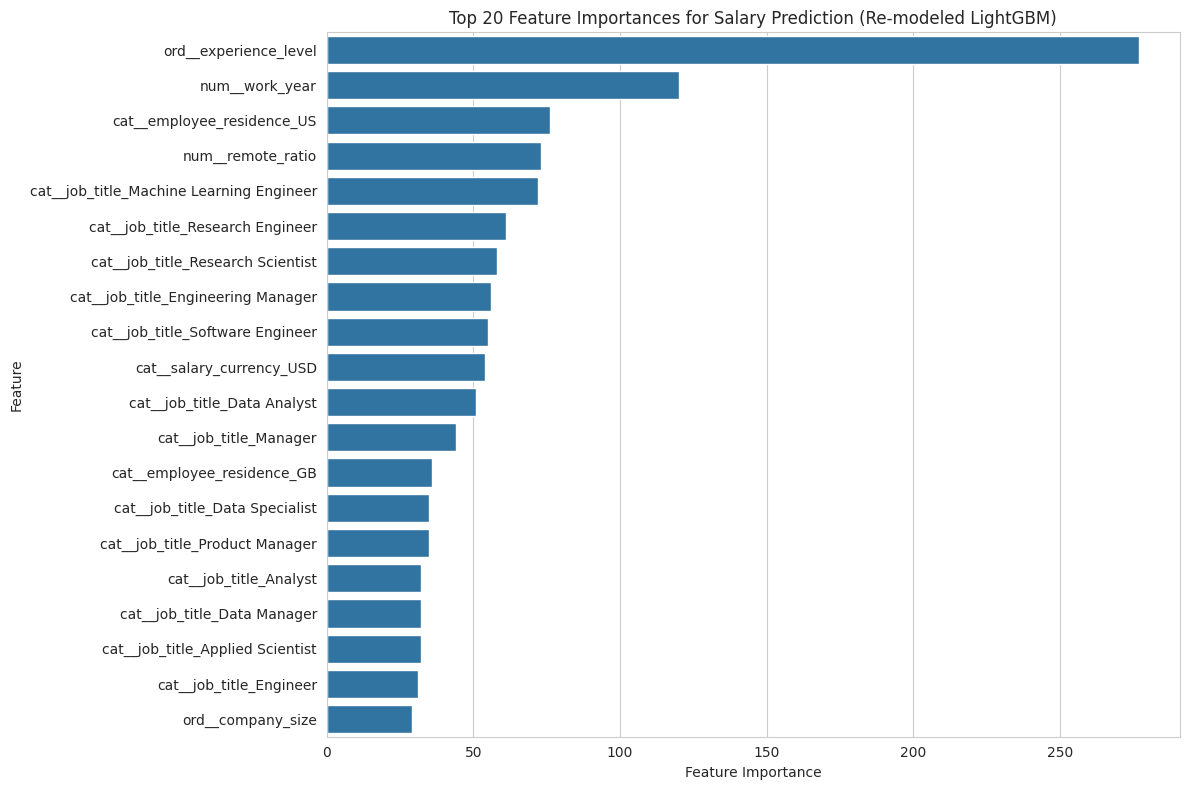


--- Re-modeling and Feature Importance Analysis Complete ---


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

# Re-load the dataset (ensure starting from a clean state)
try:
    df = pd.read_csv('salaries.csv')
    if df.duplicated().sum() > 0:
        df.drop_duplicates(inplace=True)
    print("Dataset loaded and initial cleaning (duplicates) applied.")
except FileNotFoundError:
    print("Error: 'salaries.csv' not found. Make sure the file is in the correct directory.")
    exit()

# --- FIX: Remove the 'salary' column to prevent data leakage ---
# Define features (X) and target (y)
# Drop both 'salary_in_usd' (target) and 'salary' (data leakage)
X = df.drop(['salary_in_usd', 'salary'], axis=1)
y = df['salary_in_usd']

print("\n'salary' column removed from features to prevent data leakage.")
print("New features (X) columns:", X.columns.tolist())


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets.")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# Define feature categories and ordinal orders (as before)
# Note: 'salary_currency' is still relevant as it was part of the original salary conversion.
numerical_features = ['remote_ratio', 'work_year']
ordinal_features = ['experience_level', 'company_size']
nominal_features = ['employment_type', 'job_title', 'employee_residence', 'company_location', 'salary_currency']

experience_order = ['EN', 'MI', 'SE', 'EX']
company_size_order = ['S', 'M', 'L']

# Create and train the preprocessor and LightGBM pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('ord', OrdinalEncoder(categories=[experience_order, company_size_order]), ordinal_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), nominal_features)
    ],
    remainder='drop' # Change remainder to 'drop' as we expect all relevant features to be explicitly handled
)

pipeline_lgbm_remodel = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', lgb.LGBMRegressor(random_state=42))])

print("\n--- Re-training LightGBM Model (without salary leakage) ---")
pipeline_lgbm_remodel.fit(X_train, y_train)
y_pred_lgbm_remodel = pipeline_lgbm_remodel.predict(X_test)
print("LightGBM Regressor Model (re-modeled) Trained.")

# --- Re-evaluate the Re-modeled LightGBM ---
print("\n--- Re-evaluating Re-modeled LightGBM Regressor ---")

mae = mean_absolute_error(y_test, y_pred_lgbm_remodel)
mse = mean_squared_error(y_test, y_pred_lgbm_remodel)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lgbm_remodel)

print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R2): {r2:.4f}")

# Plot Actual vs. Predicted for the re-modeled LightGBM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgbm_remodel, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Actual vs. Predicted Salaries (Re-modeled LightGBM Regressor)')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.show()



# --- Extract Feature Importances from the Re-modeled LightGBM ---
print("\n--- Extracting Feature Importances from Re-modeled LightGBM Model ---")

preprocessor_step_remodel = pipeline_lgbm_remodel.named_steps['preprocessor']
lgbm_model_remodel = pipeline_lgbm_remodel.named_steps['regressor']

# Get the feature names after transformation
try:
    final_feature_names_after_transform_remodel = preprocessor_step_remodel.get_feature_names_out()
except Exception as e:
    print(f"Error getting feature names from re-modeled preprocessor: {e}")
    print("Falling back to manual feature name construction.")
    transformed_feature_names = []
    transformed_feature_names.extend(numerical_features)
    transformed_feature_names.extend(ordinal_features)
    transformed_feature_names.extend(preprocessor_step_remodel.named_transformers_['cat'].get_feature_names_out(nominal_features))
    final_feature_names_after_transform_remodel = transformed_feature_names

feature_importances_remodel = lgbm_model_remodel.feature_importances_

# CRUCIAL CHECK for re-modeled
if len(final_feature_names_after_transform_remodel) != len(feature_importances_remodel):
    print(f"ERROR: Mismatch in re-modeled feature names length ({len(final_feature_names_after_transform_remodel)}) "
          f"and importance length ({len(feature_importances_remodel)})")
    exit()

importance_df_remodel = pd.DataFrame({
    'Feature': final_feature_names_after_transform_remodel,
    'Importance': feature_importances_remodel
})

importance_df_remodel = importance_df_remodel.sort_values(by='Importance', ascending=False)

print("\nTop 20 Feature Importances (Re-modeled):")
print(importance_df_remodel.head(20))

# Visualize Re-modeled Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_remodel.head(20))
plt.title('Top 20 Feature Importances for Salary Prediction (Re-modeled LightGBM)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


print("\n--- Re-modeling and Feature Importance Analysis Complete ---")